/tmp/ipykernel_518075/189145751.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,0].boxplot(perplexities, labels=levels)
/tmp/ipykernel_518075/189145751.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot(raw_ifs, labels=levels)
/tmp/ipykernel_518075/189145751.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(dgs, labels=levels)
/tmp/ipykernel_518075/189145751.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot(plddts, labels=

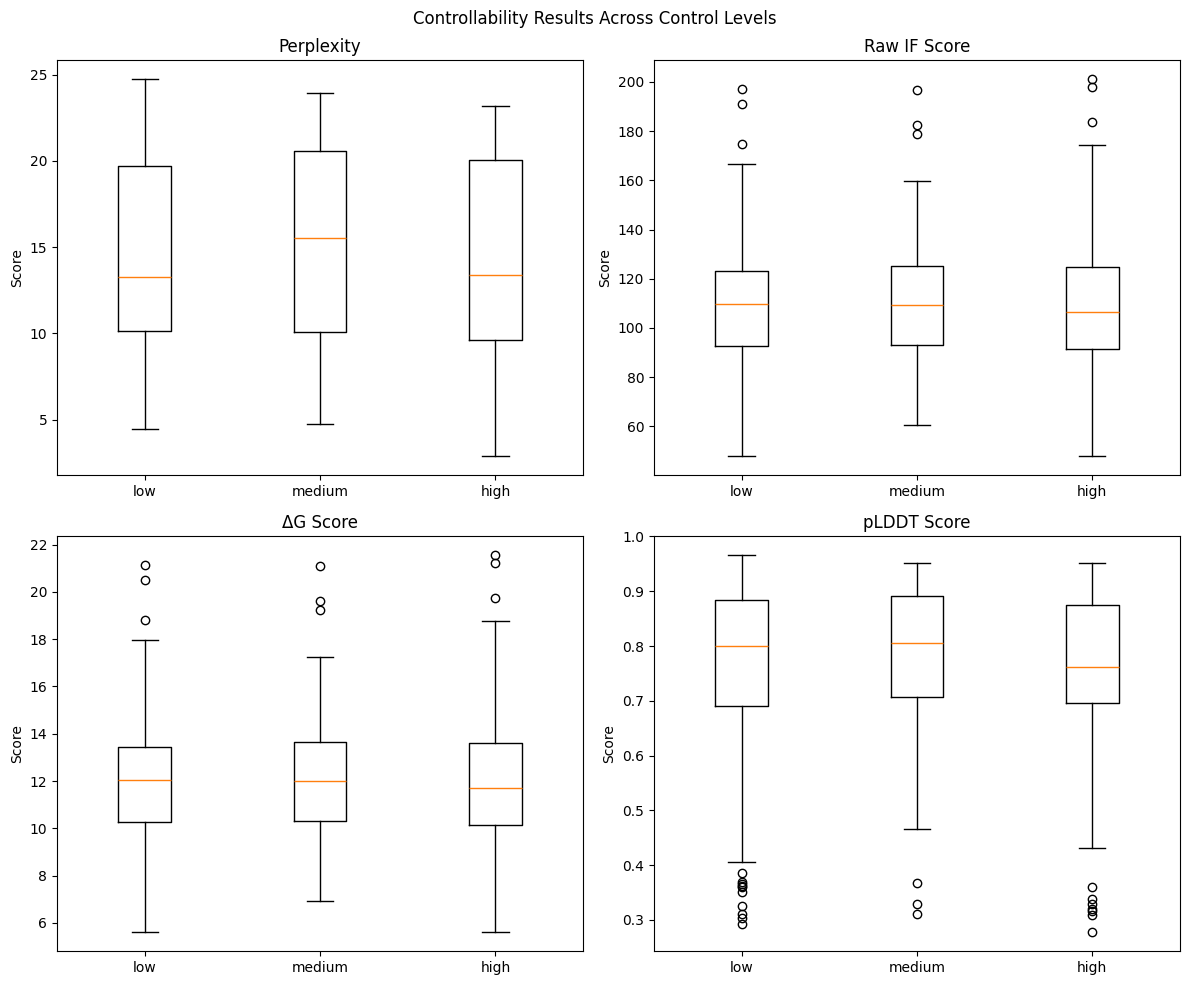

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load results
with open('DPO_ZymCTRL/brenda_results/controllability_results.json', 'r') as f:
    results = json.load(f)

# Extract metrics for each control level
levels = ['low', 'medium', 'high']
perplexities = []
raw_ifs = []
dgs = []
plddts = []

for level in levels:
    perplexities.append(results[level]['metrics']['perplexity'])
    raw_ifs.append(results[level]['metrics']['stability']['raw_if'])
    dgs.append(results[level]['metrics']['stability']['dg'])
    plddts.append(results[level]['metrics']['stability']['plddt'])

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Controllability Results Across Control Levels')

# Plot perplexity
axes[0,0].boxplot(perplexities, labels=levels)
axes[0,0].set_title('Perplexity')
axes[0,0].set_ylabel('Score')

# Plot raw IF 
axes[0,1].boxplot(raw_ifs, labels=levels)
axes[0,1].set_title('Raw IF Score')
axes[0,1].set_ylabel('Score')

# Plot dG
axes[1,0].boxplot(dgs, labels=levels)
axes[1,0].set_title('ΔG Score')
axes[1,0].set_ylabel('Score')

# Plot pLDDT
axes[1,1].boxplot(plddts, labels=levels)
axes[1,1].set_title('pLDDT Score')
axes[1,1].set_ylabel('Score')

plt.tight_layout()
plt.show()
